# Clustering (Unsupervised Learning)

# Exploratory Data Analysis

## Exercise

### Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

### Answer those questions through a mix of statistical tests and visualizations.

In [1]:
# Library imports

# Visualizations & Wranglings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

# Import the prepapre and acquire modules
import acquire
import prepare
from prepare import get_exploration_data, get_zillow, get_modeling_data, scale_zillow, prepare_zillow

# Statistical Tests
import scipy.stats as stats
from scipy.stats import levene


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Get and rename Overall zillow data columns

In [2]:
zillow = prepare_zillow()
zillow.head(2)

Status: Acquiring data from cached csv file..


,id,parcel_id,air_cond_id,architect_style_id,basement_sqft,bath_count,bed_count,building_class_id,building_quality_id,calc_bath_n_bed,...,census_tract_and_block,log_error,transaction_date,construction_desc,story_desc,property_land_use_desc,heating_or_system_desc,bldg_class_desc,architect_style_desc,air_con_desc
0,787,17173851,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,6.111004e+13,0.088469,2017-01-03,NaN,NaN,Single Family Residential,NaN,NaN,NaN,NaN
1,1702,10821119,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,...,6.037131e+13,0.025629,2017-01-03,NaN,NaN,Single Family Residential,Central,NaN,NaN,NaN


#### Acquire Exploration Zillow Data

In [6]:
train = get_exploration_data()

Status: Acquiring data from cached csv file..


In [7]:
train.head(3)

,id,parcel_id,air_cond_id,architect_style_id,basement_sqft,bath_count,bed_count,building_class_id,building_quality_id,calc_bath_n_bed,...,census_tract_and_block,log_error,transaction_date,construction_desc,story_desc,property_land_use_desc,heating_or_system_desc,bldg_class_desc,architect_style_desc,air_con_desc
1006346,2316322,11789767,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,6.037209e+13,NaN,NaN,NaN,NaN,"Duplex (2 Units, Any Combination)",NaN,NaN,NaN,NaN
984661,1617555,12280373,NaN,NaN,NaN,1.0,2.0,NaN,4.0,1.0,...,6.037542e+13,NaN,NaN,NaN,NaN,Single Family Residential,Floor/Wall,NaN,NaN,NaN
1192843,2312258,17239546,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,...,6.111008e+13,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,NaN,NaN


#### Initial Exploration

In [ ]:
# train.info()

In [8]:
train.describe()

,id,parcel_id,air_cond_id,architect_style_id,basement_sqft,bath_count,bed_count,building_class_id,building_quality_id,calc_bath_n_bed,...,num_stories,fire_place_flag,structure_tax_value,tax_value,assessment_year,land_tax_value,tax_amount,tax_delinquency_year,census_tract_and_block,log_error
count,1.908789e+06,1.908789e+06,521532.000000,3828.000000,1053.000000,1.908772e+06,1.908778e+06,8093.000000,1.243493e+06,1.835927e+06,...,438362.000000,3294.0,1.880996e+06,1.888808e+06,1.908788e+06,1.872575e+06,1.896167e+06,36198.000000,1.862832e+06,49628.000000
mean,1.491081e+06,1.332284e+07,1.941566,7.199321,638.609687,2.215722e+00,3.093356e+00,3.739899,6.279851e+00,2.303007e+00,...,1.400902,1.0,1.778668e+05,4.432883e+05,2.015998e+03,2.684645e+05,5.406817e+03,13.905409,6.048402e+13,0.016711
std,8.607494e+05,7.894017e+06,3.152955,2.441632,489.974625,1.077108e+00,1.270657e+00,0.492841,1.729125e+00,1.002312e+00,...,0.537238,0.0,4.540712e+05,8.239630e+05,6.119055e-02,4.949179e+05,9.798866e+03,2.760380,2.057247e+11,0.167092
min,1.000000e+00,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,...,1.000000,1.0,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,2.400000e-01,0.000000,-1.000000e+00,-4.655420
25%,7.457340e+05,1.164239e+07,1.000000,7.000000,280.000000,2.000000e+00,2.000000e+00,4.000000,5.000000e+00,2.000000e+00,...,1.000000,1.0,7.766700e+04,1.882100e+05,2.016000e+03,7.972300e+04,2.470000e+03,14.000000,6.037400e+13,-0.024528
50%,1.491234e+06,1.254418e+07,1.000000,7.000000,539.000000,2.000000e+00,3.000000e+00,4.000000,6.000000e+00,2.000000e+00,...,1.000000,1.0,1.269930e+05,3.210955e+05,2.016000e+03,1.767380e+05,4.006840e+03,14.000000,6.037571e+13,0.006594
75%,2.236066e+06,1.409628e+07,1.000000,7.000000,840.000000,3.000000e+00,4.000000e+00,4.000000,8.000000e+00,3.000000e+00,...,2.000000,1.0,2.040502e+05,5.141822e+05,2.016000e+03,3.262140e+05,6.231900e+03,15.000000,6.059042e+13,0.038981
max,2.982284e+06,1.696019e+08,13.000000,27.000000,4122.000000,3.200000e+01,2.500000e+01,5.000000,1.200000e+01,3.200000e+01,...,20.000000,1.0,2.280000e+08,3.196225e+08,2.016000e+03,9.401108e+07,3.823176e+06,99.000000,6.111009e+13,3.394544


In [ ]:
list(train.columns)

### Visualize the row data

### Target: --> logerror

## (a). Is the log error significantly different for homes with 1, 2, or 3 storey levels?

- ### H0 = 'log error of home with 1, 2 and 3 stories are equal'
- ### H1 = 'log error of home with 1, 2 and 3 stories are un-equal ''

In [8]:
# Check the most common stories levels
train.num_stories.value_counts().head(3)

1.0    272914
2.0    155261
3.0     10128
Name: num_stories, dtype: int64

In [2]:
plt.figure(figsize = (16, 10))
sns.scatterplot(data=train[train.num_stories == 1], x = 'num_stories', y = 'log_error')
sns.scatterplot(data=train[train.num_stories == 2], x = 'num_stories', y = 'log_error')
sns.scatterplot(data=train[train.num_stories == 3], x = 'num_stories', y = 'log_error')

plt.title('Number of stories vs Log Error', size = 20)
plt.xlabel('Number of Stories')
plt.ylabel('Log Error')
plt.xlim(0, 4)
plt.show()

NameError: name 'train' is not defined

<Figure size 1152x720 with 0 Axes>

In [13]:
mean_log_error_1_storey = train[train.num_stories == 1].log_error.mean()
mean_log_error_2_storey = train[train.num_stories == 2].log_error.mean()
mean_log_error_3_storey = train[train.num_stories == 3].log_error.mean()

print('Log Errors (Storey):')
print(f'\n\t1 Storey: {mean_log_error_1_storey}')
print(f'\n\t2 Stories: {mean_log_error_2_storey}')
print(f'\n\t3 Stories: {mean_log_error_3_storey}')

Log Errors (Storey):

	1 Storey: 0.019424044136647875

	2 Stories: 0.022313220288454175

	3 Stories: 0.022194864265104537


In [50]:
# Check the variance
print('Variance:\n')
print(f'\tStorey 1: {train[train.num_stories == 1].log_error.var()} \n\tStorey 2: {train[train.num_stories == 2].log_error.var()} \n\tStorey 3: {train[train.num_stories == 3].log_error.var()}')


Variance:

	Storey 1: 0.037355666491292 
	Storey 2: 0.02492327300906344 
	Storey 3: 0.03724440293704202


In [51]:
train.head(3)

,id,parcel_id,air_cond_id,architect_style_id,basement_sqft,bath_count,bed_count,building_class_id,building_quality_id,calc_bath_n_bed,...,census_tract_and_block,log_error,transaction_date,construction_desc,story_desc,property_land_use_desc,heating_or_system_desc,bldg_class_desc,architect_style_desc,air_con_desc
1006346,2316322,11789767,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,6.037209e+13,NaN,NaN,NaN,NaN,"Duplex (2 Units, Any Combination)",NaN,NaN,NaN,NaN
984661,1617555,12280373,NaN,NaN,NaN,1.0,2.0,NaN,4.0,1.0,...,6.037542e+13,NaN,NaN,NaN,NaN,Single Family Residential,Floor/Wall,NaN,NaN,NaN
1192843,2312258,17239546,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,...,6.111008e+13,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,NaN,NaN


### T-test

In [47]:
# Set alpha level
alpha = 0.05

# Log Error Relatioship between 1 and 3 stories?

stat, p = levene((train[train.num_stories == 1].log_error), 
                 (train[train.num_stories == 2].log_error), 
                 (train[train.num_stories == 3].log_error))

stat, p




(nan, nan)

### Conclusion

- #### T-test??

- #### correlation doesn't tell the whole story of a dataset, however...:
    - #### 1 & 3 stories home are closely related unlike 2 stories homes


## (b). Does the log-error vary between single family residential with central, wall unit, refrigeration, window unit and evaporation cooler?

In [16]:
train.property_land_use_desc.unique()

array(['Duplex (2 Units, Any Combination)', 'Single Family Residential',
       'Condominium', 'Quadruplex (4 Units, Any Combination)',
       'Planned Unit Development', 'Mobile Home',
       'Triplex (3 Units, Any Combination)', 'Cooperative',
       'Store/Office (Mixed Use)',
       'Commercial/Office/Residential Mixed Used', 'Cluster Home',
       'Manufactured, Modular, Prefabricated Homes',
       'Residential General', 'Townhouse', 'Residential Common Area',
       'Inferred Single Family Residential'], dtype=object)

In [17]:
# Create single family subset

single_family_homes = train[train.property_land_use_desc == 'Single Family Residential']
single_family_homes.shape

(1378135, 68)

In [18]:
# Create log error means for single family home with different AC types
central_ac_single_fam_log_error = single_family_homes[single_family_homes.air_con_desc == 'Central'].log_error.mean()
wall_ac_single_fam_log_error = single_family_homes[single_family_homes.air_con_desc == 'Wall Unit'].log_error.mean()
refrigeration_ac_single_fam_log_error = single_family_homes[single_family_homes.air_con_desc == 'Refrigeration'].log_error.mean()
window_ac_single_fam_log_error = single_family_homes[single_family_homes.air_con_desc == 'Window Unit'].log_error.mean()
evaporation_cooler_ac_single_fam_log_error = single_family_homes[single_family_homes.air_con_desc == 'Evaporative Cooler'].log_error.mean()

print('Log Errors (Air Conditionings):')
print(f'\n\tCentral AC: {mean_log_error_1_storey}')
print(f'\n\tWall Unit AC: {wall_ac_single_fam_log_error}')
print(f'\n\tRefrigeration AC: {refrigeration_ac_single_fam_log_error}')
print(f'\n\tWindow Unit AC: {window_ac_single_fam_log_error}')
print(f'\n\tEvaporation Cooler AC: {evaporation_cooler_ac_single_fam_log_error}')



Log Errors (Air Conditionings):

	Central AC: 0.019424044136647875

	Wall Unit AC: 0.021631246250154525

	Refrigeration AC: nan

	Window Unit AC: nan

	Evaporation Cooler AC: nan


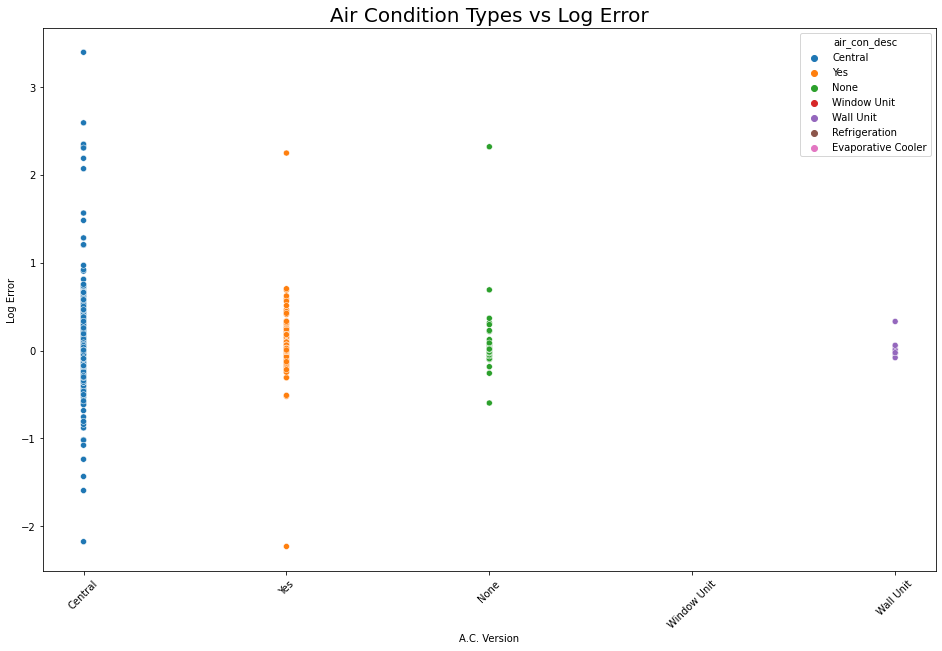

In [19]:
plt.figure(figsize = (16, 10))

sns.scatterplot(data = single_family_homes, x = 'air_con_desc', y = 'log_error', hue = 'air_con_desc' )
plt.title('Air Condition Types vs Log Error', size = 20)
plt.xlabel('A.C. Version')
plt.ylabel('Log Error')
plt.xticks(rotation = 45)
plt.show()


### T-test

In [20]:
single_fam_ac_central = single_family_homes[single_family_homes.air_con_desc == 'Central'].log_error
single_fam_ac_wall = single_family_homes[single_family_homes.air_con_desc == 'Wall Unit'].log_error

t, p = stats.ttest_ind(single_fam_ac_central, single_fam_ac_wall, equal_var=False)
t, p / 2

(nan, nan)

### Conclusion

## (c). Is the log error for homes with solar heating system significant vs those without?

In [ ]:
train.heating_or_system_desc.unique()

In [33]:
# Solar Homes
solar_heating_homes = train[train.heating_or_system_desc == 'Solar']

# Non-solar homes 
non_solar_homes = train[train.heating_or_system_desc != 'Solar']

In [34]:
# Log Errors

mean_solar_home_log_error = solar_heating_homes.log_error.mean()


mean_non_solar_home_log_error = non_solar_homes.log_error.mean()

print('Log Errors (Solar-Non Solar Heating):')

print(f'\n\tSolar Homes: {mean_solar_home_log_error} \n\tNon-Solar Home: {mean_non_solar_home_log_error}')

Log Errors (Solar-Non Solar Heating):

	Solar Homes: 0.00048399855650352384 
	Non-Solar Home: 0.016731743104491992


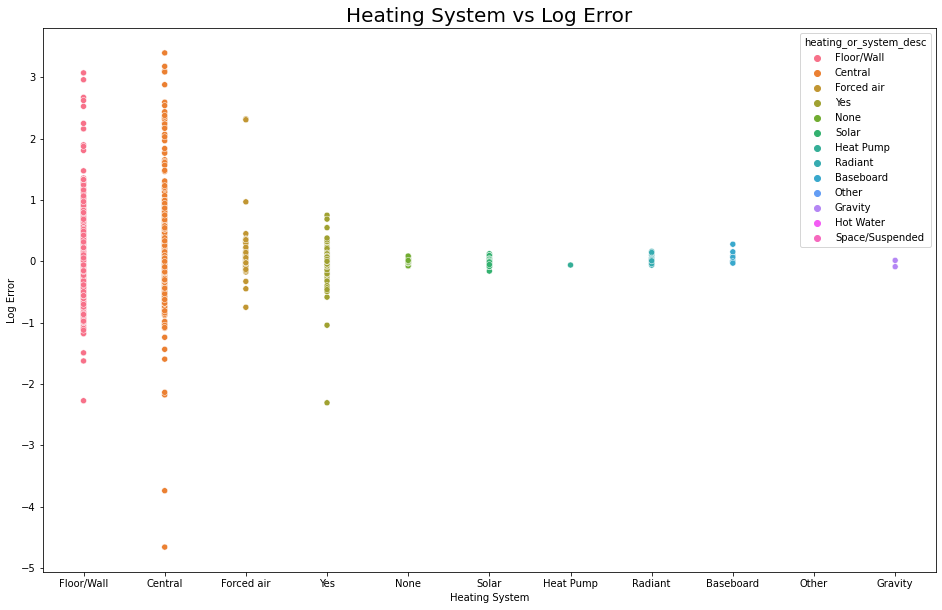

In [35]:
plt.figure(figsize = (16, 10))

sns.scatterplot(data = train, x = 'heating_or_system_desc', y = 'log_error', hue = 'heating_or_system_desc' )
plt.title('Heating System vs Log Error', size = 20)
plt.xlabel('Heating System')
plt.ylabel('Log Error')
plt.show()

### T-test 

### Conclusionm

## (d). Is the log-error for single family homes with one storey having central AC significant with log-error for single family homes with 2 stories having central AC? 

In [21]:
# Create subsets

single_story_ac_homes  = train[(train.num_stories == 1) & (train.air_con_desc == 'Central')]
two_story_ac_homes  = train[(train.num_stories == 2) & (train.air_con_desc == 'Central')]


In [31]:
single_story_ac_homes_log_error = single_story_ac_homes.log_error.mean()
two_story_ac_homes_log_error = two_story_ac_homes.log_error.mean()

single_story_ac_homes_log_error, two_story_ac_homes_log_error

(0.006943178862199973, 0.017440012405048878)

### T-test

In [30]:
t, p = stats.ttest_ind(single_story_ac_homes_log_error, two_story_ac_homes_log_error, equal_var=False)
t, p / 2

(nan, nan)

### Conclusion

## (e). Is the log-error for single family homes with one storey having central heating system significant with log-error for single family homes with 2 stories having central heating systemm? 

### T-test

### Conclusion